In [66]:
import numpy as np
import pandas as pd

import seaborn as sns
import sklearn 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# 1. Gather Data

In [67]:
# Read in training and testing data using
data = pd.read_csv("Employee.csv")

# See a sample of the dataset
data.sample(20)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
969,PHD,2013,New Delhi,3,26,Male,No,4,0
3644,Bachelors,2018,Bangalore,3,33,Female,No,3,1
1952,PHD,2017,New Delhi,3,24,Male,No,2,0
3009,Bachelors,2015,Pune,3,41,Male,No,5,0
290,Bachelors,2016,Bangalore,3,24,Male,No,2,0
1362,Bachelors,2015,Bangalore,3,24,Male,No,2,1
4524,Bachelors,2017,New Delhi,2,30,Male,No,5,0
2917,Bachelors,2017,New Delhi,3,26,Female,No,4,0
744,Bachelors,2014,Pune,3,25,Male,No,3,1
1738,Bachelors,2017,Bangalore,3,24,Female,No,2,0


### Feature type summary:


| Feature Type |   |   |   |   ||
|  ----  | ----  | ----  | ----  | ----  |----  |
| Continuous Features| Age (Continuous) | JoiningYear (Continuous)||
| Categorical Features| Education | Payment Tire | Gender | Leave or not |ExperienceInCurrentDomain|
| Alphanumeric Features| City| Education| | |

# 2. Data Cleaning
There are 4 stage to do data cleaning:

- Correcting: Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.
- Completing: There are null values or missing data in the age, cabin, and embarked field.
- Creating: we might need to use existing features to create new features to determine if they provide new signals to predict our outcome.
- Converting: we will convert object datatypes to categorical dummy variables.

## Data correcting:
- We care about whether there exit some unacceptable data inputs. For example, a person has age greater than 120.
- In the meantime, we want to check whether there is some outlier (but reasonable values), and we will wait until after we complete our analysis to determine if we should include them to our dataset.


In [68]:
## Bochen
data.describe(include = "all")

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


From above we can see:
- Joining Year $\in$ [2012, 2018] 
- Age $\in$ [22, 41]
- ExperienceInCurrentDomain $\in$ [0, 7]
- PaymentTier $\in$ [1, 3]
- Gender $\in$ ["Male", "Female	"]
- LeaveOrNot $\in$ [0, 1]
- City $\in$ ["Bangalore", "New Delhi", "Pune"]
- Education $\in$ ["Bachelors", "Masters", "PHD"]

There does not exists any unacceptable data and obvious outliers in our dataset.

## Data Completing:

In [69]:
## Bochen
print('Features with null values:\n', data.isnull().sum())

Features with null values:
 Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


There does not exist data missing in our dataset.

## Data Creating:

In [70]:
### We can discuss this later

## Data Converting:

In [71]:
data.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3988,Bachelors,2016,Bangalore,3,38,Female,No,7,0
212,Masters,2013,Bangalore,2,28,Female,No,2,1
2560,Masters,2015,Pune,3,29,Female,No,4,0
1215,Bachelors,2016,Pune,2,27,Female,No,5,1
3338,Bachelors,2014,Pune,3,37,Male,No,1,0


In [72]:
## Bochen
label = LabelEncoder()

data['Education_Code'] = label.fit_transform(data['Education'])
data['City_Code'] = label.fit_transform(data['City'])
data['Gender_Code'] = label.fit_transform(data['Gender'])
data['Benched_Code'] = label.fit_transform(data['EverBenched'])

In [73]:
data.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Code,City_Code,Gender_Code,Benched_Code
2308,Bachelors,2018,Bangalore,3,27,Male,Yes,5,1,0,0,1,1
825,Bachelors,2012,Bangalore,3,27,Female,No,5,0,0,0,0,0
2388,Bachelors,2015,Pune,2,29,Female,Yes,1,1,0,2,0,1
44,Bachelors,2015,Pune,3,39,Male,No,4,0,0,2,1,0
4126,Bachelors,2015,Bangalore,3,35,Female,No,1,1,0,0,0,0


In [74]:
data.describe(include = "all")


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Code,City_Code,Gender_Code,Benched_Code
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000,4653.00000,4653.000000,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN,NaN,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864,0.26456,0.793681,0.597034,0.102729
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047,0.52112,0.841979,0.490547,0.303638
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000,0.00000,1.000000,1.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000,0.00000,2.000000,1.000000,0.000000


In [75]:
# Data Cleaning - Maimoonah
# data = pd.get_dummies(data, drop_first=True)
# data.head()



# 3. Data Visualization

## General View

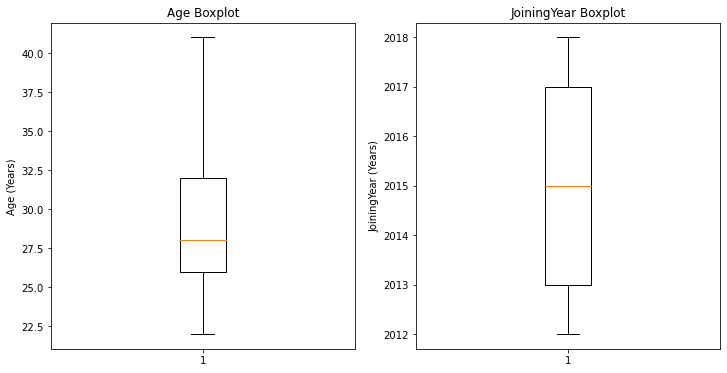

In [76]:
## Bochen
plt.figure(figsize=[12, 6])
plt.subplot(121)
plt.boxplot(x=data['Age'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')


plt.subplot(122)
plt.boxplot(x=data['JoiningYear'])
plt.title('JoiningYear Boxplot')
plt.ylabel('JoiningYear (Years)')

plt.show()

<AxesSubplot:xlabel='Education', ylabel='LeaveOrNot'>

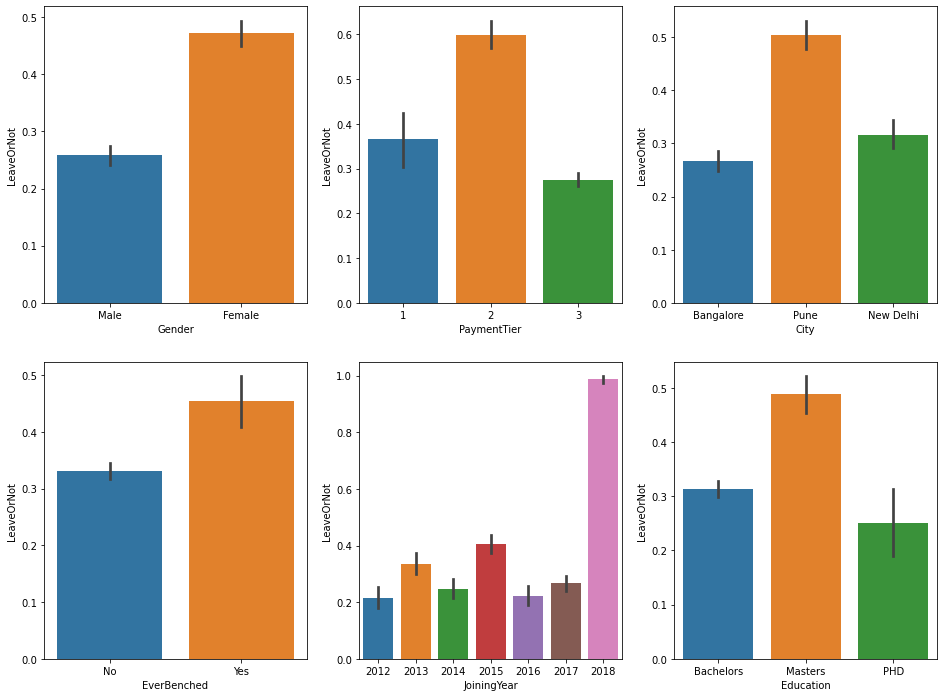

In [77]:
## Bochen
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x="Gender", y="LeaveOrNot", data=data, ax = saxis[0,0])
sns.barplot(x = 'PaymentTier', y = 'LeaveOrNot', data=data, ax = saxis[0,1])
sns.barplot(x="EverBenched", y="LeaveOrNot", data=data, ax = saxis[1,0])
sns.barplot(x = 'City', y = 'LeaveOrNot', data=data, ax = saxis[0,2])
sns.barplot(x="JoiningYear", y="LeaveOrNot", data=data, ax = saxis[1,1])
sns.barplot(x="Education", y="LeaveOrNot", data=data, ax = saxis[1,2])

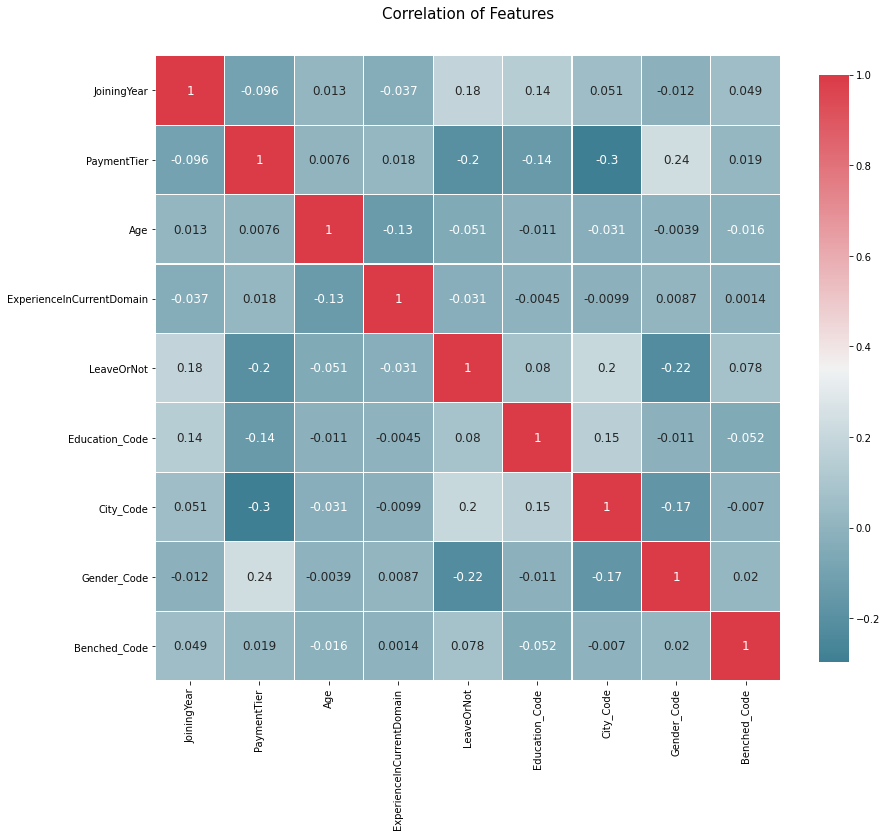

In [78]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

## Age feature

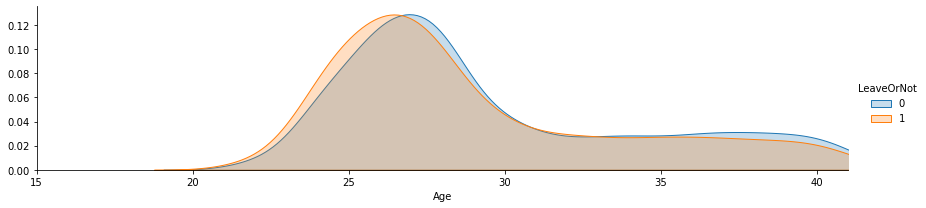

In [79]:
## Bochen
a = sns.FacetGrid( data, hue = 'LeaveOrNot', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(15 , data['Age'].max()))
a.add_legend()

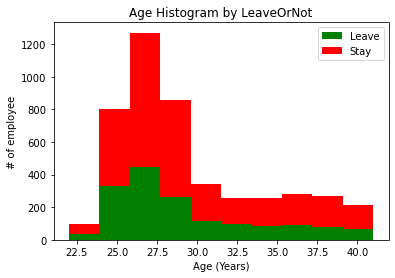

In [80]:
## Bochen
plt.hist(x = [data[data['LeaveOrNot']==1]['Age'], data[data['LeaveOrNot']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Leave','Stay'])
plt.title('Age Histogram by LeaveOrNot')
plt.xlabel('Age (Years)')
plt.ylabel('# of employee')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

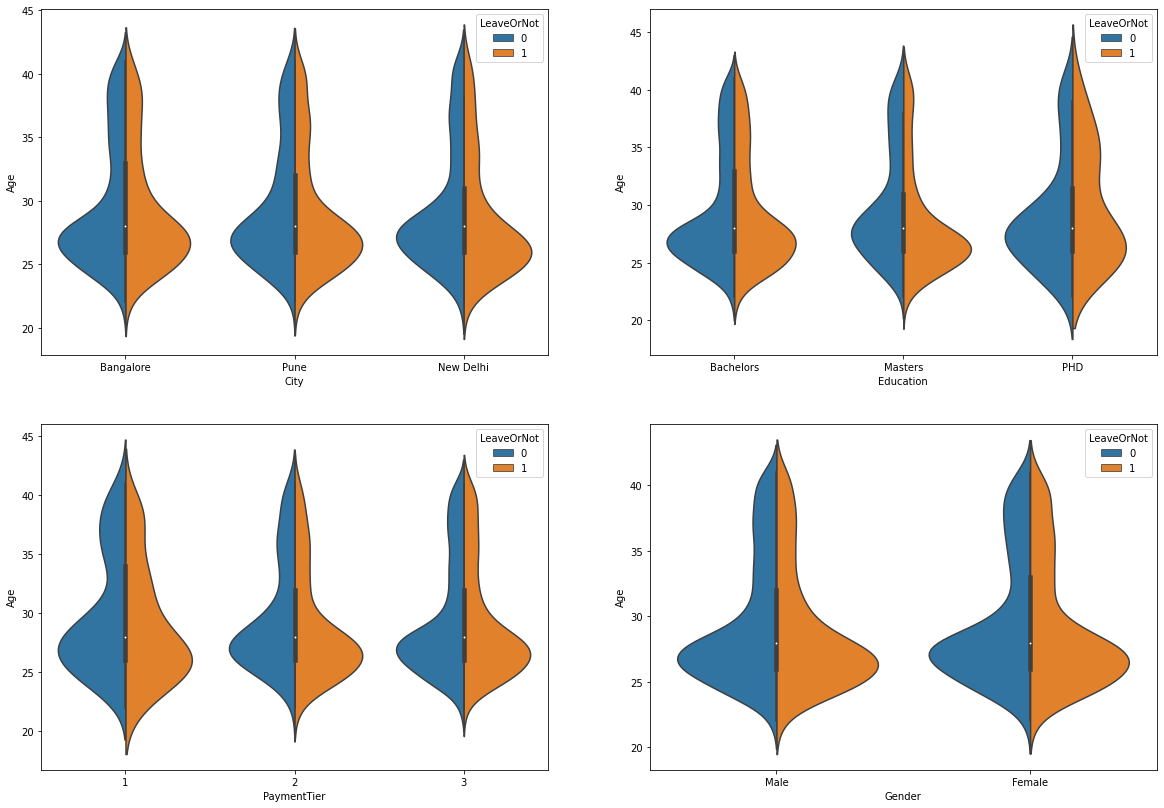

In [81]:
## Bochen

fig, qaxis = plt.subplots(2,2,figsize=(20,14))

sns.violinplot(x = 'City', y = 'Age', hue = 'LeaveOrNot', data = data, split = True, ax = qaxis[0][0])
sns.violinplot(x = 'Education', y = 'Age', hue = 'LeaveOrNot', data = data, split = True, ax = qaxis[0][1])
sns.violinplot(x = 'PaymentTier', y = 'Age', hue = 'LeaveOrNot', data = data, split = True, ax = qaxis[1][0])
sns.violinplot(x = 'Gender', y = 'Age', hue = 'LeaveOrNot', data = data, split = True, ax = qaxis[1][1])

## Gender feature

<AxesSubplot:xlabel='Gender', ylabel='LeaveOrNot'>

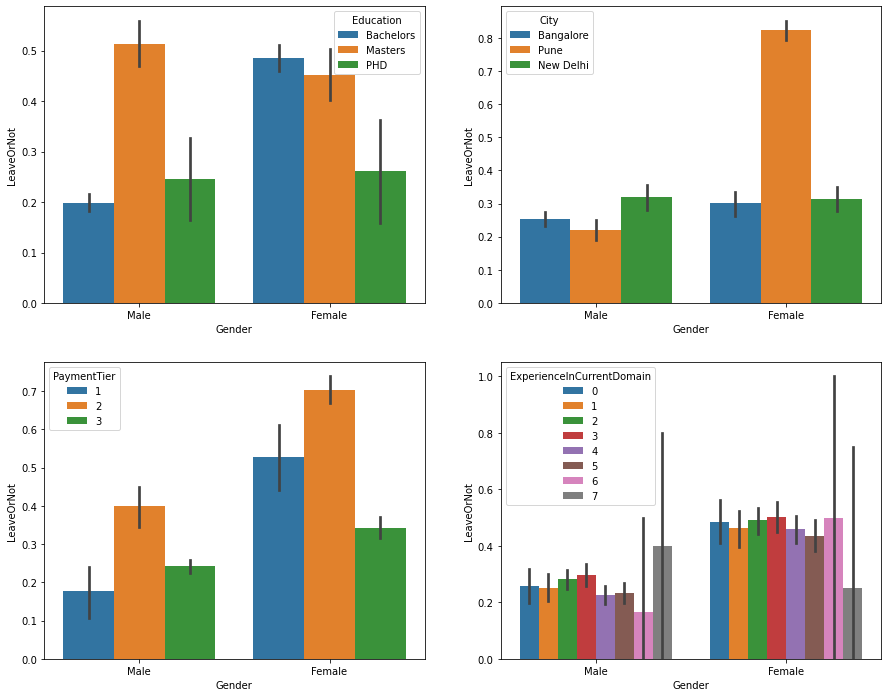

In [82]:
# bochen
fig, qaxis = plt.subplots(2,2,figsize=(15,12))

sns.barplot(x = 'Gender', y = 'LeaveOrNot', hue = 'Education', data=data, ax = qaxis[0][0])

sns.barplot(x = 'Gender', y = 'LeaveOrNot', hue = 'City', data=data, ax  = qaxis[0][1])

sns.barplot(x = 'Gender', y = 'LeaveOrNot', hue = 'PaymentTier', data=data, ax  = qaxis[1][0])

sns.barplot(x = 'Gender', y = 'LeaveOrNot', hue = 'ExperienceInCurrentDomain', data=data, ax  = qaxis[1][1])


## JoiningYear feature

<AxesSubplot:xlabel='JoiningYear', ylabel='LeaveOrNot'>

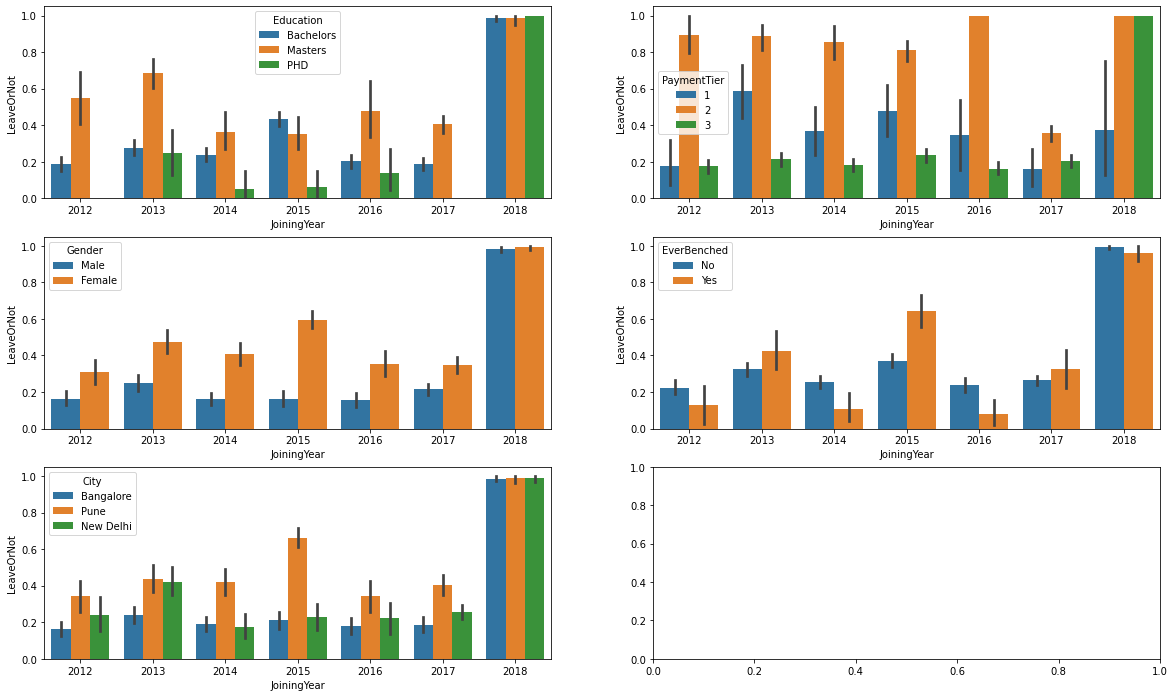

In [83]:
# bochen
fig, qaxis = plt.subplots(3,2,figsize=(20,12))

sns.barplot(x = 'JoiningYear', y = 'LeaveOrNot', hue = 'City', data=data, ax = qaxis[2][0])

sns.barplot(x = 'JoiningYear', y = 'LeaveOrNot', hue = 'PaymentTier', data=data, ax  = qaxis[0][1])

sns.barplot(x = 'JoiningYear', y = 'LeaveOrNot', hue = 'Gender', data=data, ax  = qaxis[1][0])

sns.barplot(x = 'JoiningYear', y = 'LeaveOrNot', hue = 'EverBenched', data=data, ax  = qaxis[1][1])

sns.barplot(x = 'JoiningYear', y = 'LeaveOrNot', hue = 'Education', data=data, ax  = qaxis[0][0])

<AxesSubplot:xlabel='JoiningYear', ylabel='LeaveOrNot'>

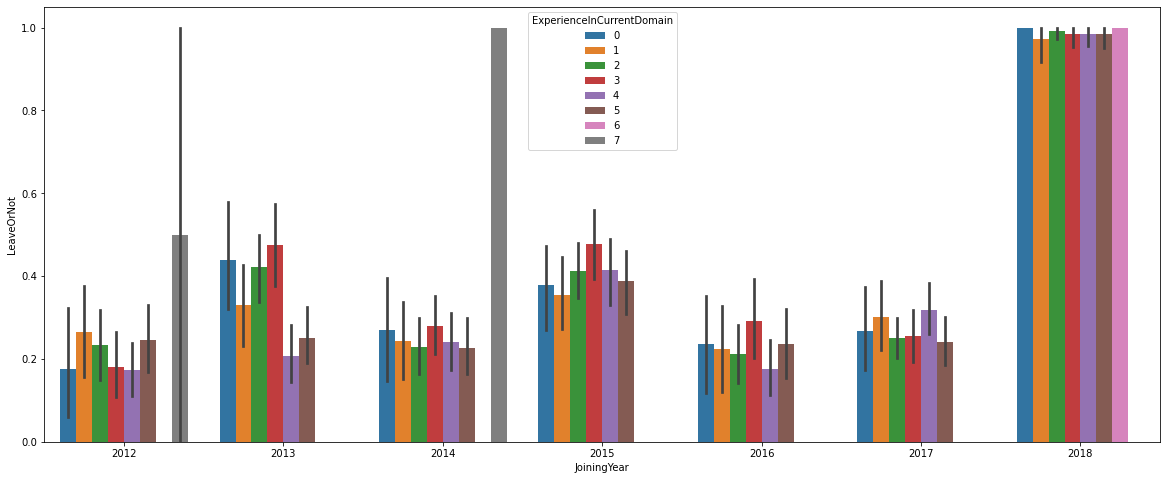

In [84]:
# bochen
fig, qaxis = plt.subplots(1,1,figsize=(20,8))
sns.barplot(x = 'JoiningYear', y = 'LeaveOrNot', hue = 'ExperienceInCurrentDomain', data=data)

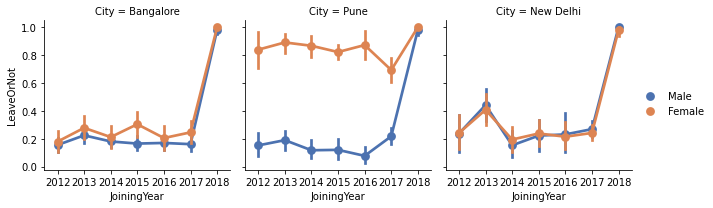

In [85]:
# bochen
e = sns.FacetGrid(data, col = 'City')
e.map(sns.pointplot, 'JoiningYear', 'LeaveOrNot', 'Gender', 
        ci=95.0, palette = 'deep', 
        order=[2012, 2013, 2014, 2015, 2016, 2017, 2018],
        hue_order = ["Male", "Female"]
        )
e.add_legend()

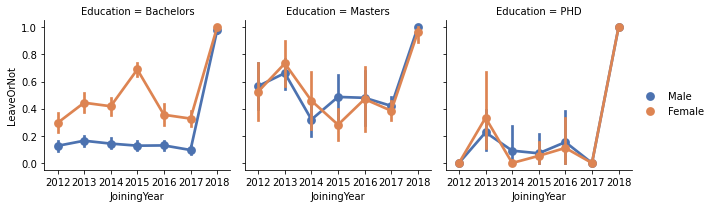

In [86]:
# bochen
e = sns.FacetGrid(data, col = 'Education')
e.map(sns.pointplot, 'JoiningYear', 'LeaveOrNot', 'Gender', 
        ci=95.0, palette = 'deep', 
        order=[2012, 2013, 2014, 2015, 2016, 2017, 2018],
        hue_order = ["Male", "Female"]
        )
e.add_legend()

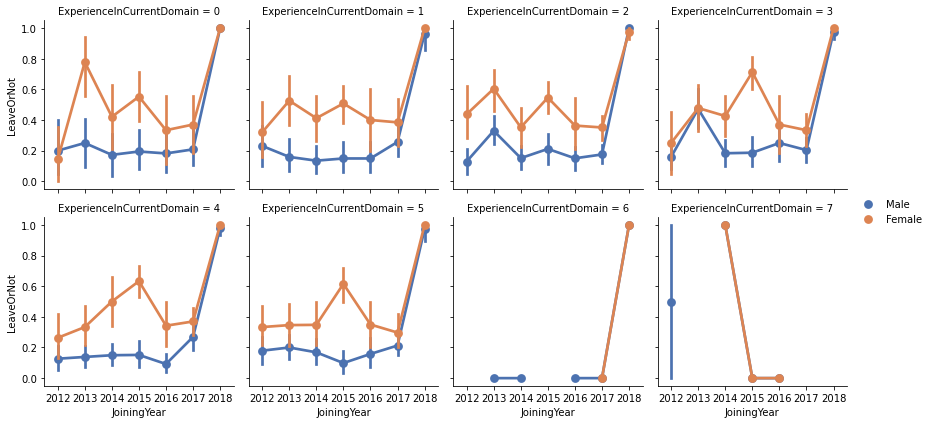

In [87]:
# bochen
e = sns.FacetGrid(data, col = 'ExperienceInCurrentDomain', col_wrap=4)
e.map(sns.pointplot, 'JoiningYear', 'LeaveOrNot', 'Gender', 
        ci=95.0, palette = 'deep', 
        order=[2012, 2013, 2014, 2015, 2016, 2017, 2018],
        hue_order = ["Male", "Female"]
        )
e.add_legend()

## PaymentTier feature

## ExperienceInCurrentDomain feature

## PaymentTier feature

## City feature

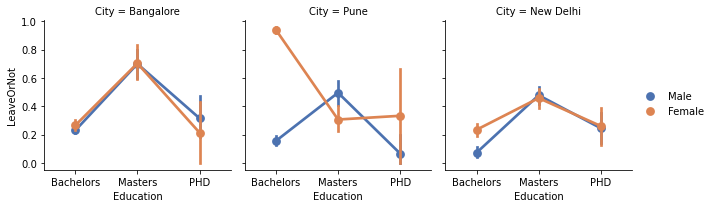

In [88]:
# bochen
e = sns.FacetGrid(data, col = 'City')
e.map(sns.pointplot, 'Education', 'LeaveOrNot', 'Gender', 
        ci=95.0, palette = 'deep', 
        order=["Bachelors", "Masters", "PHD"],
        hue_order = ["Male", "Female"]
        )
e.add_legend()

## EverBenched feature

# 5. Model
Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Naive Bayes classifier
- Decision Tree
- Neural network
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Random Forest

In [89]:
## Bochen
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [90]:
data.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Code,City_Code,Gender_Code,Benched_Code
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0,0,1,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,0,2,0,0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,0,1,0,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,1,0,1,0
4,Masters,2017,Pune,3,24,Male,Yes,2,1,1,2,1,1


In [91]:
## Bochen
df_feature = ["JoiningYear", 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'Education_Code',  'City_Code', 'Gender_Code', "Benched_Code"]

X = data[df_feature]
y = data["LeaveOrNot"]

X.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Code,City_Code,Gender_Code,Benched_Code
0,2017,3,34,0,0,0,1,0
1,2013,1,28,3,0,2,0,0
2,2014,3,38,2,0,1,0,0
3,2016,3,27,5,1,0,1,0
4,2017,3,24,2,1,2,1,1


In [92]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 6. Fine tune Model

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

modelName = []
modelAcc= []
modelValAcc = []

## Logistic Regression

In [94]:
## Bochen
logreg = LogisticRegression(max_iter=100000)

params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

grid_search_cv = GridSearchCV(logreg, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [95]:
val_log_score = round(grid_search_cv.best_score_ * 100, 2)

In [96]:
grid_search_cv.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [97]:
## Bochen
logmodel = LogisticRegression(C = 1000.0, penalty = 'l2')
logmodel.fit(x_train, y_train)

y_pred = logmodel.predict(x_val)
acc_logmodel = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logmodel)


modelName.append("Logistic Regression")
modelAcc.append(acc_logmodel)
modelValAcc.append(val_log_score)

70.77


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN

In [98]:
## Bochen
knn = KNeighborsClassifier()

params = {'n_neighbors': [3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid_search_cv = GridSearchCV(knn, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [99]:
val_KNN_score = round(grid_search_cv.best_score_ * 100, 2)

In [100]:
grid_search_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [101]:
## Bochen
KNN = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11,weights= 'distance')
KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_val)
acc_KNN = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_KNN)


modelName.append("KNN")
modelAcc.append(acc_KNN)
modelValAcc.append(val_KNN_score)

79.01


## Decision Tree

In [102]:
## Bochen
from sklearn import tree
# Decision tree model.

params = {'criterion': ['gini', 'entropy'], 
        'max_depth': range(1, 10),
        'min_samples_leaf': range(1,5)
        }


decisiontree = DecisionTreeClassifier()

grid_search_cv =  GridSearchCV(decisiontree, params, verbose=1, cv=5)

grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    4.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [103]:
## Bochen
grid_search_cv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4}

In [104]:
## Bochen
val_decision_tree = round(grid_search_cv.best_score_ * 100, 2) 
print(val_decision_tree)

84.8


In [105]:
## Bochen
decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth=6, min_samples_leaf= 4)
decisiontree.fit(x_train, y_train)

y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)


modelName.append("Decision Tree")
modelAcc.append(acc_decisiontree)
modelValAcc.append(val_decision_tree)

84.17


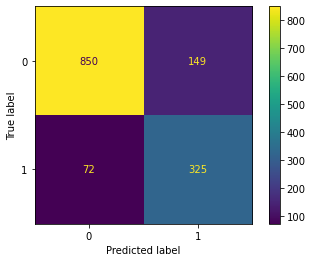

In [106]:
conf = confusion_matrix(y_pred,y_val)
ConfusionMatrixDisplay(conf).plot()
plt.show()

[Text(723.65625, 605.7257142857143, 'X[0] <= 2017.5\ngini = 0.452\nsamples = 3257\nvalue = [2131, 1126]'),
 Text(558.0, 512.537142857143, 'X[1] <= 2.5\ngini = 0.412\nsamples = 2994\nvalue = [2126, 868]'),
 Text(279.0, 419.34857142857146, 'X[0] <= 2016.5\ngini = 0.493\nsamples = 788\nvalue = [349, 439]'),
 Text(139.5, 326.16, 'X[1] <= 1.5\ngini = 0.392\nsamples = 433\nvalue = [116, 317]'),
 Text(69.75, 232.9714285714286, 'X[5] <= 1.5\ngini = 0.483\nsamples = 137\nvalue = [81, 56]'),
 Text(34.875, 139.7828571428571, 'X[5] <= 0.5\ngini = 0.369\nsamples = 86\nvalue = [65, 21]'),
 Text(17.4375, 46.594285714285775, 'gini = 0.292\nsamples = 62\nvalue = [51, 11]'),
 Text(52.3125, 46.594285714285775, 'gini = 0.486\nsamples = 24\nvalue = [14, 10]'),
 Text(104.625, 139.7828571428571, 'X[6] <= 0.5\ngini = 0.431\nsamples = 51\nvalue = [16, 35]'),
 Text(87.1875, 46.594285714285775, 'gini = 0.229\nsamples = 38\nvalue = [5, 33]'),
 Text(122.0625, 46.594285714285775, 'gini = 0.26\nsamples = 13\nvalue =

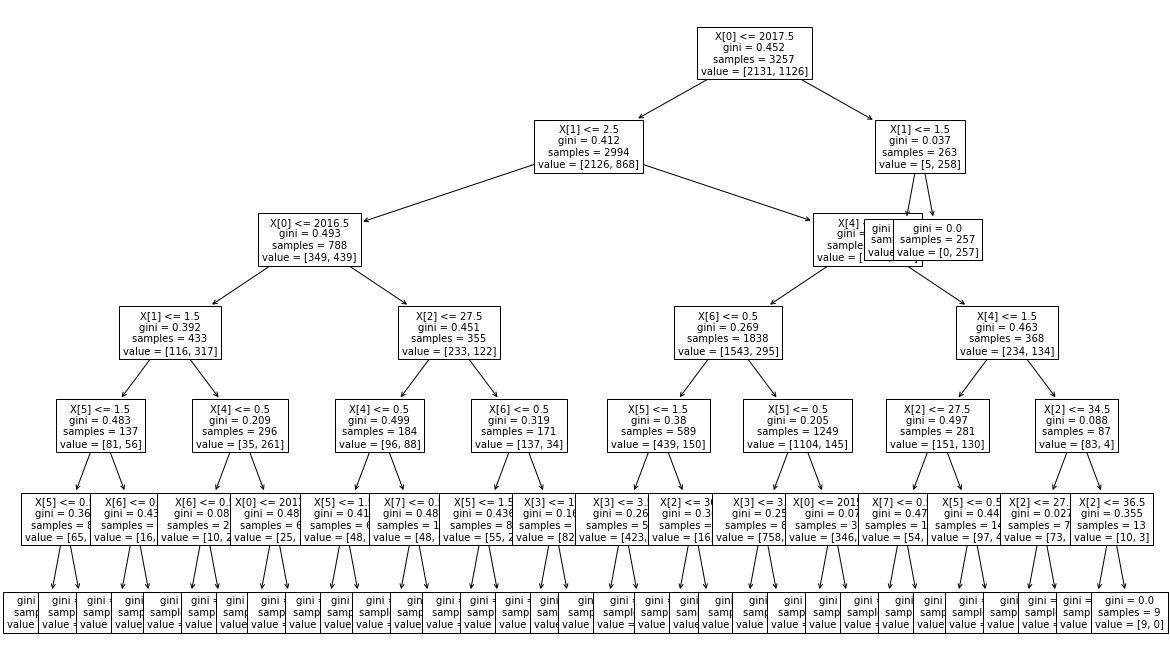

In [107]:
## Bochen
plt.figure(figsize=(20,12))
tree.plot_tree(decisiontree, fontsize=10)

## Naive Bayes Classifier

### GaussianNB

In [109]:
# maimoonah

parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

gaussian_nb = GridSearchCV(estimator=GaussianNB(), param_grid=parameters, verbose=1, cv=5, n_jobs=-1)
result = gaussian_nb.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


In [110]:
[result.best_score_,result.best_params_]

[0.7061703090102062, {'var_smoothing': 0.006579332246575682}]

In [111]:
val_Gaussian = round(result.best_score_ * 100, 2) 
print(val_Gaussian)

70.62


In [112]:
## Bochen
Gaussian = GaussianNB(var_smoothing = 0.006579332246575682)
Gaussian.fit(x_train, y_train)

y_pred = Gaussian.predict(x_val)
acc_Gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_Gaussian)


modelName.append("Gaussian Naive Bayes")
modelAcc.append(acc_Gaussian)
modelValAcc.append(val_Gaussian)

70.2


### BernoulliNB

In [113]:
# maimoonah

fit_prior = [False,True]
parameters = dict({'alpha':np.linspace(0.1,1,10)}, fit_prior=fit_prior)

bernoulli_nb = GridSearchCV(estimator=BernoulliNB(), param_grid=parameters, verbose=1, cv=20, n_jobs=-1)
result = bernoulli_nb.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.4s finished


In [114]:
[result.best_score_,result.best_params_]

[0.6923540104521699, {'alpha': 0.1, 'fit_prior': True}]

In [115]:
val_BernoulliNB = round(result.best_score_ * 100, 2) 
print(val_BernoulliNB)

69.24


In [116]:
## Bochen
Bernoull = BernoulliNB(alpha = 0.1, fit_prior=True)
Bernoull.fit(x_train, y_train)

y_pred = Bernoull.predict(x_val)
acc_Bernoull = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_Bernoull)


modelName.append("Bernoull Naive Bayes")
modelAcc.append(acc_Bernoull)
modelValAcc.append(val_BernoulliNB)

67.98


## Neural Network

### Muti-layer Perceptron

In [117]:
## Bochen
mlp = MLPClassifier(max_iter=1000)

params = {
    'hidden_layer_sizes': [(20,),(10,15,20), (10, 20, 30)],
    'activation': ['relu', 'logistic'],
    'solver': [ 'lbfgs'],
    'alpha': [ 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_search_cv = GridSearchCV(mlp, params, n_jobs=-1, cv=5)
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.01, 0.05],
                         'hidden_layer_sizes': [(20,), (10, 15, 20),
                                                (10, 20, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs']})

In [118]:
grid_search_cv.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (10, 20, 30),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}

In [119]:
val_MLP_score= round(grid_search_cv.best_score_ * 100, 2)

In [120]:
## Bochen
MLP = MLPClassifier(activation = 'relu', alpha = 0.05, hidden_layer_sizes=(10, 15, 20), learning_rate= 'constant', solver='lbfgs')
MLP.fit(x_train, y_train)

y_pred = MLP.predict(x_val)
acc_MLP = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_MLP)

modelName.append("MLP")
modelAcc.append(acc_MLP)
modelValAcc.append(val_MLP_score)

66.05


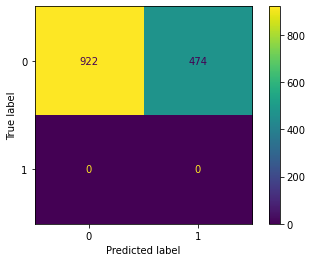

In [121]:
conf = confusion_matrix(y_pred,y_val)
ConfusionMatrixDisplay(conf).plot()
plt.show()

In [122]:
## Bochen
models = pd.DataFrame({
    'Model': modelName,
    'Score': modelAcc})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,84.17
1,KNN,79.01
0,Logistic Regression,70.77
3,Gaussian Naive Bayes,70.20
4,Bernoull Naive Bayes,67.98
5,MLP,66.05


In [123]:
## Bochen
models = pd.DataFrame({
    'Model': modelName,
    'Val Acc': modelValAcc})
models.sort_values(by='Val Acc', ascending=False)

,Model,Val Acc
2,Decision Tree,84.80
1,KNN,80.13
0,Logistic Regression,71.66
3,Gaussian Naive Bayes,70.62
5,MLP,70.22
4,Bernoull Naive Bayes,69.24


### Deep neural Network

In [38]:
# maimoonah

#Define tensorflow model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

def build_model(layers, dropout_rate):
    model = tf.keras.Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=x_train.shape[1]))
            model.add(Activation(activations.relu))
            model.add(Dropout(dropout_rate))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activations.relu))
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='softmax'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [57]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=build_model)

# defining the grid search parameters 
batchSize = [10, 5]
epochs = [20, 30]
dropout_rate = [0.0]
layers = [(20, 30, 40), (10, 20, 30)]
#activations = ['relu', 'sigmoid']

parameter_grid = dict(layers=layers, dropout_rate=dropout_rate, batch_size=batchSize, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=parameter_grid, scoring="accuracy", n_jobs=-1, cv=5,error_score='raise', verbose=1)
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Epoch 1/20
326/326 [==============================] - 2s 3ms/step - loss: 1.9825 - acc: 0.3457
Epoch 2/20
326/326 [==============================] - 1s 3ms/step - loss: 1.0825 - acc: 0.3457
Epoch 3/20
326/326 [==============================] - 1s 3ms/step - loss: 0.9399 - acc: 0.3457
Epoch 4/20
326/326 [==============================] - 1s 3ms/step - loss: 0.8646 - acc: 0.3457
Epoch 5/20
326/326 [==============================] - 1s 3ms/step - loss: 0.8934 - acc: 0.3457
Epoch 6/20
326/326 [==============================] - 1s 3ms/step - loss: 0.8002 - acc: 0.3457
Epoch 7/20
326/326 [==============================] - 1s 3ms/step - loss: 0.7617 - acc: 0.3457
Epoch 8/20
326/326 [==============================] - 1s 3ms/step - loss: 0.8739 - acc: 0.3457
Epoch 9/20
326/326 [==============================] - 1s 3ms/step - loss: 0.7717 - acc: 0.3457
Epoch 10/20
326/326 [==============================] - 1s 3ms/step - loss: 0.7705 - a

In [53]:
[grid_result.best_score_,grid_result.best_params_]

[0.34571918615061303,
 {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 20, 'layers': (20, 30, 40)}]

## Random Forest

In [126]:
## Bochen
randomforest = RandomForestClassifier()

params = {'bootstrap': [True, False],
            'max_depth': [30, 40, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [100, 200, 400, 600]}

grid_search_cv = GridSearchCV(randomforest, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [30, 40, 50, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 400, 600]})

In [127]:
val_score= round(grid_search_cv.best_score_ * 100, 2) 

In [128]:
grid_search_cv.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 600}

In [129]:
## Bochen
RandomForest = RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features='auto',
 min_samples_leaf= 4,
 min_samples_split= 5,
 n_estimators= 600)
RandomForest.fit(x_train, y_train)

y_pred = RandomForest.predict(x_val)
acc_RandomForest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_RandomForest)

modelName.append("RandomForest")
modelAcc.append(acc_RandomForest)
modelValAcc.append(val_score)

85.1


## Gradient Boosting

In [132]:
## Bochen
gbk = GradientBoostingClassifier()

params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

grid_search_cv = GridSearchCV(gbk, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]})

In [133]:
val_score= round(grid_search_cv.best_score_ * 100, 2)

In [134]:
grid_search_cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2090909090909091,
 'n_estimators': 10,
 'subsample': 1.0}

In [136]:
gbk_model = GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.2,
 loss= 'deviance',
 max_depth= 8,
 max_features= 'log2',
 min_samples_leaf= 0.1,
 min_samples_split= 0.2090909090909091,
 n_estimators= 10,
 subsample= 1.0)
gbk_model.fit(x_train, y_train)

y_pred = gbk_model.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

modelName.append("Gradient Boosting")
modelAcc.append(acc_gbk)
modelValAcc.append(val_score)

72.85


## Support Vector Machine Classifer

In [41]:
# maimoonah

from sklearn.svm import SVC  
from sklearn.metrics import classification_report

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       599
           1       0.36      1.00      0.53       332

    accuracy                           0.36       931
   macro avg       0.18      0.50      0.26       931
weighted avg       0.13      0.36      0.19       931



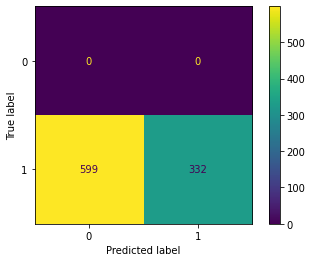


Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       619
           1       0.87      0.51      0.64       312

    accuracy                           0.81       931
   macro avg       0.83      0.74      0.76       931
weighted avg       0.82      0.81      0.80       931



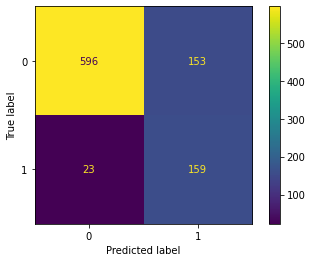


Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       616
           1       0.00      0.00      0.00       315

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.44      0.66      0.53       931



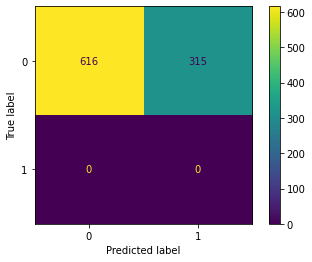


Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       592
           1       0.67      0.37      0.47       339

    accuracy                           0.70       931
   macro avg       0.69      0.63      0.63       931
weighted avg       0.70      0.70      0.68       931



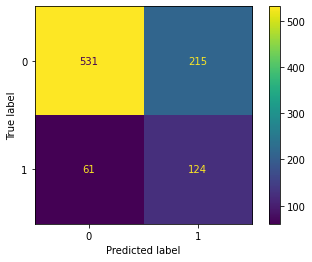

In [49]:
import warnings
warnings.filterwarnings('ignore')

for i in range(4):
    # Separate data into test and training sets
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(Xtrain, ytrain)# Make prediction
    y_pred = svclassifier.predict(Xtest)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(ytest,y_pred))
    conf_m = confusion_matrix(y_pred,ytest)
    ConfusionMatrixDisplay(conf_m).plot()
    plt.show()
    print()
    

In [137]:
## Bochen
models = pd.DataFrame({
    'Model': modelName,
    'Score': modelAcc})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,RandomForest,85.10
2,Decision Tree,84.17
1,KNN,79.01
7,Gradient Boosting,72.85
0,Logistic Regression,70.77
3,Gaussian Naive Bayes,70.20
4,Bernoull Naive Bayes,67.98
5,MLP,66.05


In [138]:
## Bochen
models = pd.DataFrame({
    'Model': modelName,
    'Val Acc': modelValAcc})
models.sort_values(by='Val Acc', ascending=False)

,Model,Val Acc
6,RandomForest,85.45
2,Decision Tree,84.80
1,KNN,80.13
7,Gradient Boosting,74.70
0,Logistic Regression,71.66
3,Gaussian Naive Bayes,70.62
5,MLP,70.22
4,Bernoull Naive Bayes,69.24


# 4. Model the data

Intercept [-0.00709297] 
Coefficients: [[ 5.22323823e-04 -3.79757090e-01 -2.07009146e-02 -2.09368732e-02
   2.37005729e-01  3.41395822e-01 -7.76429609e-01  7.71447595e-01]]
 tp: 246 
 tn: 1075 
 fp: 140 
 fn: 401 
 Accuracy(Score): 0.709452201933405
 tp: 182 
 tn: 825 
 fp: 109 
 fn: 280 
 Accuracy(Score): 0.7213467048710601


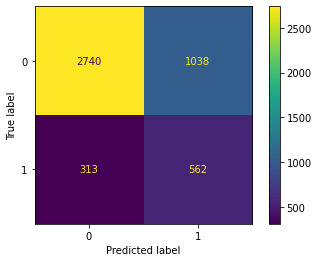

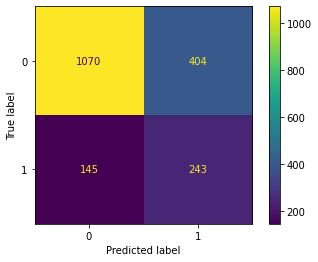

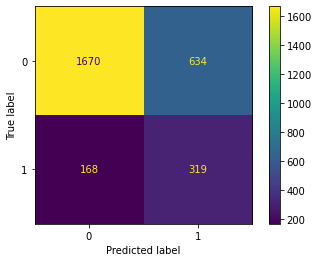

In [44]:
# Jiayi Zhang Logistic Regression
dflr = LogisticRegression(penalty='none',max_iter=10000)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=80)

dflr = dflr.fit(Xtrain,ytrain)

print(f"Intercept {dflr.intercept_} \nCoefficients: {dflr.coef_}")

ypr = dflr.predict(Xtest)

# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[1]))
tn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[0]))
fp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[0]))
fn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[1]))
acc = (tp + tn) / (tp + tn + fp + fn)
print(" tp:", tp, "\n","tn:",tn, "\n", "fp:", fp, "\n", "fn:", fn, "\n", "Accuracy(Score):", acc )

# When test size is 0.3
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X, y, test_size=0.3, random_state=80)
dflr3 = dflr.fit(Xtrain3,ytrain3)
ypr3 = dflr3.predict(Xtest3)
# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[1]))
tn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[0]))
fp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[0]))
fn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[1]))
acc3 = (tp3 + tn3) / (tp3 + tn3 + fp3 + fn3)
print(" tp:", tp3, "\n","tn:",tn3, "\n", "fp:", fp3, "\n", "fn:", fn3, "\n", "Accuracy(Score):", acc3 )

#plot confusion metrix for all data
yall = dflr.predict(X)
conf = confusion_matrix(yall,y)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for test data
yte = dflr.predict(Xtest)
conf = confusion_matrix(yte,ytest)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for train data
ytr = dflr.predict(Xtrain)
conf = confusion_matrix(ytr,ytrain)
ConfusionMatrixDisplay(conf).plot()
plt.show()

 tp: 243 
 tn: 1070 
 fp: 145 
 fn: 404 
 Accuracy(Score): 0.7051557465091299
 tp: 224 
 tn: 880 
 fp: 54 
 fn: 238 
 Accuracy(Score): 0.7908309455587392


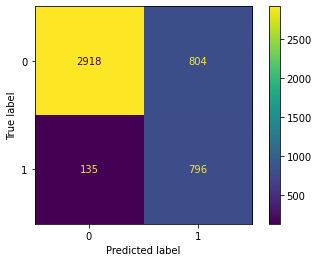

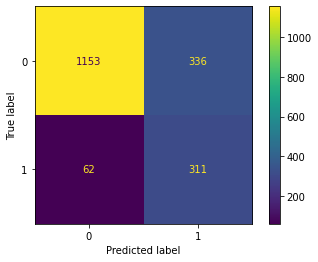

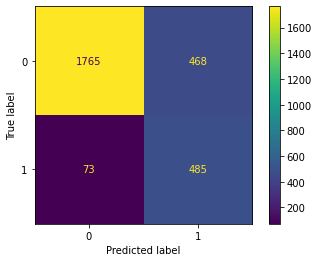

In [45]:
# Jiayi Zhang KNN
knn = KNeighborsClassifier(n_neighbors = 14)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=80)

knn = knn.fit(Xtrain,ytrain)

ypr = dflr.predict(Xtest)

# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[1]))
tn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[0]))
fp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[0]))
fn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[1]))
acc = (tp + tn) / (tp + tn + fp + fn)
print(" tp:", tp, "\n","tn:",tn, "\n", "fp:", fp, "\n", "fn:", fn, "\n", "Accuracy(Score):", acc )

# When test size is 0.3
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X, y, test_size=0.3, random_state=80)
dflr3 = knn.fit(Xtrain3,ytrain3)
ypr3 = knn.predict(Xtest3)
# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[1]))
tn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[0]))
fp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[0]))
fn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[1]))
acc3 = (tp3 + tn3) / (tp3 + tn3 + fp3 + fn3)
print(" tp:", tp3, "\n","tn:",tn3, "\n", "fp:", fp3, "\n", "fn:", fn3, "\n", "Accuracy(Score):", acc3 )

#plot confusion metrix for all data
yall = knn.predict(X)
conf = confusion_matrix(yall,y)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for test data
yte = knn.predict(Xtest)
conf = confusion_matrix(yte,ytest)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for train data
ytr = knn.predict(Xtrain)
conf = confusion_matrix(ytr,ytrain)
ConfusionMatrixDisplay(conf).plot()
plt.show()